In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import modelproject.example

In [33]:
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import numpy as np

To print nicely:

In [3]:
sm.init_printing(use_unicode=True)

The Solow model with human capital is as follows:

\begin{equation}
Y_t = K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha -\varphi} \tag{1} \\
\end{equation}
\begin{equation}
r_t = \alpha \left(\frac{K_t}{A_t L_t}\right)^{\alpha -1} \left(\frac{H_t}{A_t L_t}\right)^{\varphi} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) \left(\frac{K_t}{A_tL_t}\right)^{\alpha} \left(\frac{H_t}{A_tL_t}\right)^{\varphi}A_t \tag{3}
\end{equation}
\begin{equation}
K_{t+1}-K_t = s_K Y_t - \delta K_t \quad , \quad K_0 \text{ given} \tag{4}
\end{equation}
\begin{equation}
H_{t+1}-H_t = s_H Y_t -\delta H_t \quad , \quad H_0 \text{ given} \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1+n)L_t \quad , \quad L_0 \text{ given} \tag{6}
\end{equation}
\begin{equation}
A_{t+1} = (1+g)A_t \quad , \quad A_0 \text{ given} \tag{7}
\end{equation}

We also define the following equations:
\begin{equation}
\text{Physical capital per effective worker}: \quad \tilde{k_t} = \frac{K_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Human capital per effective worker}: \quad \tilde{h_t} = \frac{H_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Output per effective worker}: \quad \tilde{y_t} = \frac{Y_t}{A_tL_t}
\end{equation}
\begin{equation}
\tilde{y_t} = \tilde{k_t}^{\alpha} \tilde{h_t}^{\varphi}
\end{equation}

Defining all the things as symbols so we can use sympy:

In [4]:
y = sm.symbols("y_t")
k = sm.symbols("k_t")
r = sm.symbols("r_t")
A = sm.symbols("A_t")
w = sm.symbols("w_t")
n = sm.symbols("n")
g = sm.symbols("g")
sK = sm.symbols("s_K")
sH = sm.symbols("s_H")
alpha = sm.symbols("alpha")
delta = sm.symbols("delta")
phi = sm.symbols("varphi")
ktilde = sm.symbols("ktilde_t")
htilde = sm.symbols("htilde_t")
ytilde = sm.symbols("ytilde_t")
ktildestar = sm.symbols("ktilde^*")
htildestar = sm.symbols("htilde^*")
ytildestar = sm.symbols("ytilde^*")
ystar = sm.symbols("y^*")

Checking that we get the symbols as wished:

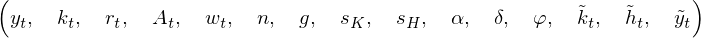

In [5]:
y, k, r, A, w, n, g, sK, sH, alpha, delta, phi, ktilde, htilde, ytilde

We will now find the steady state values for variables $\tilde{k^*}, \tilde{h^*}$ and $\tilde{y^*}$ by solving the following equations:

\begin{equation}
\tilde{k}_{t+1} - \tilde{k}_t = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{k}_t)
\end{equation}
\begin{equation}
\tilde{h}_{t+1} - \tilde{h}_t = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{h}_t)
\end{equation}

First we make variables which transform $\tilde{h}_t$ into a function og $\tilde{k}_t$ and vice verca:

In [6]:
ktildealpha = ktilde**alpha
htildephi = htilde**phi
htok = (sH/sK)*ktilde
htokphi = ((sH/sK)*ktilde)**phi
ktoh = (sK/sH)*htilde
ktohalpha = ((sK/sH)*htilde)**alpha

We set up the equation to solve for $\tilde{h}_{t+1} = \tilde{h}_t = \tilde{h}^*$:

In [7]:
eq = sm.Eq(sH*ktildealpha*htildephi - (n+g+delta+n*g)*htilde)
eq

Then we solve it for $\tilde{h}_t$:

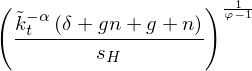

In [40]:
hisolated = sm.solve(eq,htilde)[0]
hisolated

Now we insert the transformed $\tilde{h}_t$:

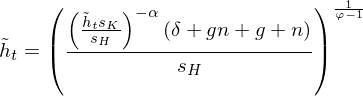

In [9]:
htildefinal = sm.Eq(htilde , ((ktoh**(-alpha)*(delta+n*g+g+n)/sH)**(1/(phi-1))))
htildefinal

And solve for the steady state:

We find that the steady state value for htilde is:


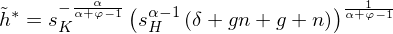

In [10]:
hsteady = sm.solve(htildefinal,htilde)[0]
print('We find that the steady state value for htilde is:')
sm.Eq(htildestar, hsteady)

We now do the same for $\tilde{k}_t$:

In [11]:
eq2 = sm.Eq(sK*ktildealpha*htildephi - (n+g+delta+n*g)*ktilde)
eq2

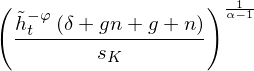

In [65]:
kisolated = sm.solve(eq2,ktilde)[0]
kisolated

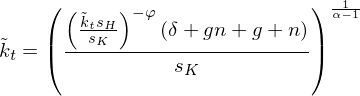

In [13]:
ktildefinal = sm.Eq(ktilde, ((htok**(-phi)*(delta+n*g+g+n)/sK)**(1/(alpha-1))))
ktildefinal

We finde that the steady state value for ktilde is:


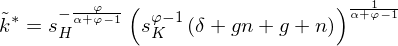

In [14]:
ksteady = sm.solve(ktildefinal,ktilde)[0]
print('We finde that the steady state value for ktilde is:')
sm.Eq(ktildestar, ksteady)

Now we can plot this into $\tilde{y}^*$:

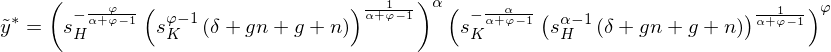

In [15]:
yfinal = sm.Eq(ytildestar, ksteady**alpha * hsteady**phi)
ysteady = sm.solve(yfinal, ytildestar)[0]
yfinal

We now get that the BNP per capita in steady state must be:

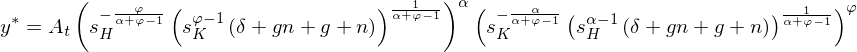

In [16]:
sm.Eq(ystar, A*ysteady)

We can now create functions which gives us the steady state values for each parameter:

In [17]:
ss_h = sm.lambdify((sK, sH, n, g, delta, alpha, phi), hsteady)
ss_k = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ksteady)
ss_y = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ysteady)
def steady_states(sK, sH, n, g, delta, alpha, phi):
    
    """Returns the steady state value for human capital per effective worker.
    Has the following parameters:
    sK: investments in physical income
    sH: investments in human capital
    n: increase in labour
    g: increase in technology
    delta: the depreciation rate
    alpha: return on physical capital
    phi: return on human capital"""
    
    return print('Steady state for human capital is', ss_h(sK, sH, n, g, delta, alpha, phi)), print('Steady state for physical capital is', ss_k(sK, sH, n, g, delta, alpha, phi)), print('Steady state for BNP per worker is', ss_y(sK, sH, n, g, delta, alpha, phi))

In [183]:
steady_states(0.2,0.2,0.01,0.02,0.01,1/3,1/3)

Steady state for human capital is 123.14359491372605
Steady state for physical capital is 123.14359491372605
Steady state for BNP per worker is 24.751862577658937


(None, None, None)

In [340]:
def simulate(htilde,ktilde,alpha,phi,delta,sK,sH,n,g,T):
    """
    Args:
    htilde: starting value for human capital per effective worker
    ktilde: starting value for physical capital per effective worker
    alpha: return on physical capital
    phi: return on human capital
    delta: depreciation rate
    sK: investments in physical income
    sH: investments in human capital
    n: increase in labour
    g: increase in technology
    T: periods to simulate through
    
    Returns:
    A plot showing how the capital accumulates over time
    """
    #Make an empty list for all our future values
    h_path = [htilde]
    k_path = [ktilde]
    
    #Adding numbers to the list using equation (5)
    for t in range(1,T):
        ktilde = t
        h_next = ((ktilde**(-alpha)*(delta+n*g+n+g))/sH)**(1/(phi-1))
        h_path.append(h_next)
    
    #Adding numbers to the list using equation (4)
    for t in range(1,T):
        ktilde = t
        k_next = ((ktilde**(-alpha+1)*(delta+n*g+n+g))/sK)**(1/(phi))
        k_path.append(k_next)
    
    #Plotting it all
    plt.plot(h_path[:T])
    plt.plot(k_path[:T])
    plt.scatter(ss_h(sK, sH, n, g, delta, alpha, phi),ss_k(sK, sH, n, g, delta, alpha, phi))
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.xlabel('Physical capital per effective worker')
    plt.ylabel('Human capital per effective worker')
    
    return plt.show()

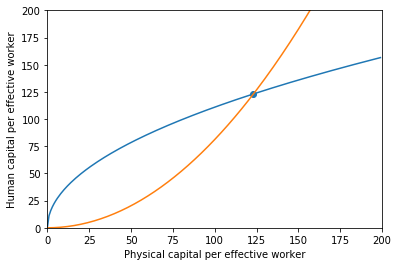

In [339]:
simulate(0,0,1/3,1/3,0.01,0.2,0.2,0.01,0.02,200)